In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_cyber = pd.read_csv('china_cyber.csv', parse_dates=True, index_col='Date')

In [7]:
df_cyber.head()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
Date,,,,,,,,,
2019-01-06,Good,0.20,669.0,52.0,553.0,10.0,2924.0,138.0,44.0
2019-01-13,Good,0.19,690.0,41.0,805.0,17.0,3634.0,225.0,68.0
2019-01-20,Good,0.21,638.0,43.0,561.0,9.0,1718.0,375.0,110.0
2019-01-27,Good,0.24,70.0,42.0,600.0,3.0,1260.0,177.0,65.0
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_cyber['status'].astype('category').head()

Date
2019-01-06    Good
2019-01-13    Good
2019-01-20    Good
2019-01-27    Good
2019-02-03     NaN
Name: status, dtype: category
Categories (3, object): [Excellent, Fair, Good]

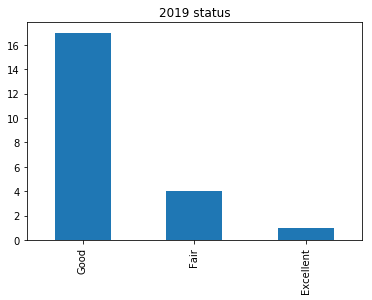

In [16]:
_ = df_cyber['status'].value_counts().plot(kind='bar')
_ = plt.title('2019 status')

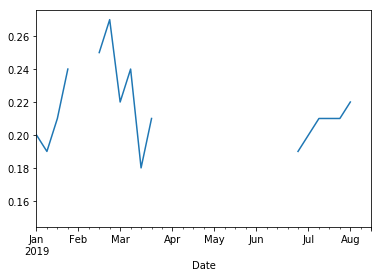

In [20]:
_ = df_cyber['infected_computers'].plot()

In [21]:
def plot_metric(column):
    df_cyber[column].plot()
    plt.title(str(column))

In [22]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk'],
      dtype='object')

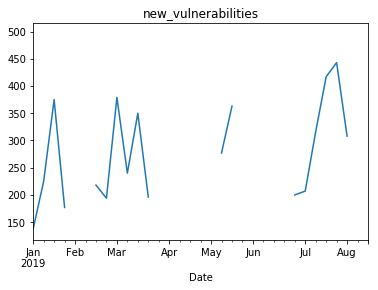

In [25]:
plot_metric('new_vulnerabilities')

In [31]:
df_cyber['status_color'] = df_cyber.status.map({'Good': int(1), 'Fair': int(2), 'Excellent': int(3)})

In [32]:
df_cyber.head()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk,status_color
Date,,,,,,,,,,
2019-01-06,Good,0.20,669.0,52.0,553.0,10.0,2924.0,138.0,44.0,1.0
2019-01-13,Good,0.19,690.0,41.0,805.0,17.0,3634.0,225.0,68.0,1.0
2019-01-20,Good,0.21,638.0,43.0,561.0,9.0,1718.0,375.0,110.0,1.0
2019-01-27,Good,0.24,70.0,42.0,600.0,3.0,1260.0,177.0,65.0,1.0
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


IndexError: Inconsistent shape between the condition and the input (got (33, 1) and (33,))